# Preparing Data

In [52]:
import pandas as pd

masses_data = pd.read_csv('mammographic_masses.data.txt')
masses_data.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [53]:
masses_data = pd.read_csv('mammographic_masses.data.txt', na_values=['?'], names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_data.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [54]:
masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [55]:
masses_data.loc[(masses_data['age'].isnull()) |
              (masses_data['shape'].isnull()) |
              (masses_data['margin'].isnull()) |
              (masses_data['density'].isnull())]

,BI-RADS,age,shape,margin,density,severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


In [56]:
masses_data.dropna(inplace=True)
masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [57]:
features_list = masses_data[['age', 'shape',
                             'margin', 'density']].values

classes_list = masses_data['severity'].values

feature_names = ['age', 'shape', 'margin', 'density']

features_list

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [58]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(features_list)
scaled_features

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(scaled_features, classes_list, test_size=0.25, random_state=0)

# Training Keras Deep Learning Model

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

def create_model():
    model = Sequential()
    model.add(Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [61]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)

cv_scores = cross_val_score(estimator, scaled_features, classes_list, cv=10)
cv_scores.mean()

0.8036144554615021

Deep Learning is actually unecessary in this scenario. After testing multiple models, including decision trees, random forest classifiers, Support Vector Machines (linear, rbf, sigmoid, and polynomial kernels), K nearest neighbors,and Naive Bayes, a simple Logistic Regression model proved to be most efficient and accurate.

# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression()
clf.fit(trainX, trainY)

LogisticRegression()

In [63]:
scores = cross_val_score(clf, scaled_features, classes_list, cv=10)
print(scores)


print(scores.mean())

[0.75903614 0.78313253 0.85542169 0.81927711 0.8313253  0.73493976
 0.79518072 0.81927711 0.87951807 0.79518072]
0.8072289156626505


# Evidence of other Models and Accuracy Values:

## Decision Trees

In [64]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(trainX, trainY)

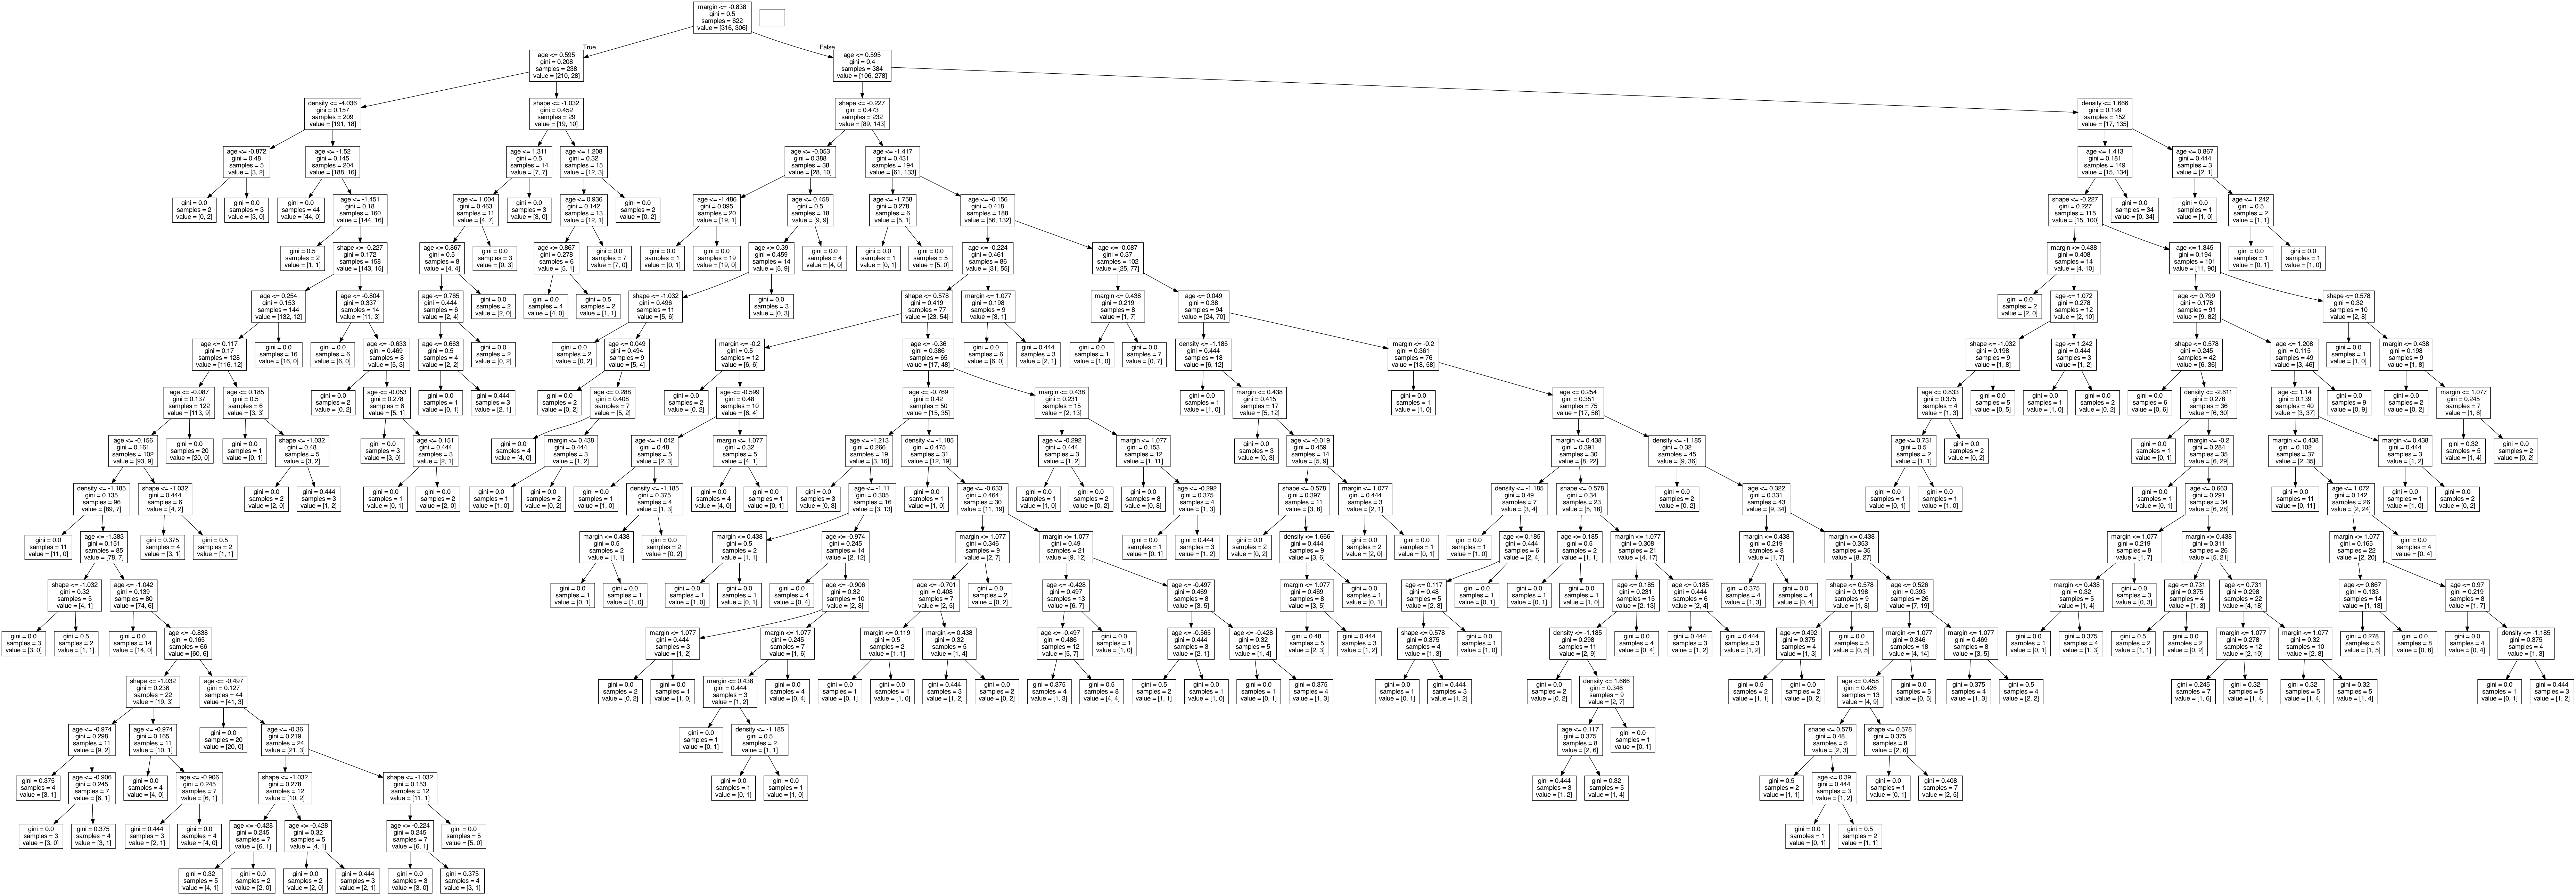

In [65]:
from IPython.display import Image  
from six import StringIO 
import pydotplus

features = ['age', 'shape','margin', 'density']
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [66]:
scores = cross_val_score(clf, scaled_features, classes_list, cv=10)
print(scores)


print(scores.mean())

[0.73493976 0.77108434 0.73493976 0.75903614 0.75903614 0.69879518
 0.73493976 0.74698795 0.75903614 0.69879518]
0.7397590361445783


## Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(testX, testY)

scores = cross_val_score(clf, scaled_features, classes_list, cv=10)
print(scores)


print(scores.mean())

[0.71084337 0.79518072 0.79518072 0.79518072 0.80722892 0.68674699
 0.75903614 0.77108434 0.75903614 0.68674699]
0.7566265060240963


## SVM

In [70]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(testX, testY)
scores = cross_val_score(clf, scaled_features, classes_list, cv=10)
print(scores)


print(scores.mean())

[0.71084337 0.79518072 0.84337349 0.80722892 0.84337349 0.72289157
 0.79518072 0.81927711 0.87951807 0.75903614]
0.7975903614457832


In [71]:
clf = svm.SVC(kernel='rbf', C=1).fit(testX, testY)


scores = cross_val_score(clf, scaled_features, classes_list, cv=10)
print(scores)


print(scores.mean())

[0.75903614 0.81927711 0.84337349 0.81927711 0.85542169 0.74698795
 0.75903614 0.78313253 0.85542169 0.77108434]
0.8012048192771084


In [72]:
clf = svm.SVC(kernel='sigmoid', C=1).fit(testX, testY)


scores = cross_val_score(clf, scaled_features, classes_list, cv=10)
print(scores)


print(scores.mean())

[0.68674699 0.69879518 0.77108434 0.74698795 0.73493976 0.72289157
 0.80722892 0.78313253 0.71084337 0.79518072]
0.7457831325301204


In [73]:
clf = svm.SVC(kernel='poly', C=1).fit(testX, testY)

scores = cross_val_score(clf, scaled_features, classes_list, cv=10)
print(scores)


print(scores.mean())

[0.75903614 0.79518072 0.84337349 0.80722892 0.8313253  0.73493976
 0.74698795 0.79518072 0.84337349 0.74698795]
0.7903614457831326


## KNN (From K=1 to K=50)

In [74]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 50):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(trainX, trainY)
    
    scores = cross_val_score(neigh, scaled_features, classes_list, cv=10)

    print(scores.mean() + i)

1.7156626506024097
2.6903614457831324
3.753012048192771
4.73855421686747
5.77710843373494
6.772289156626506
7.796385542168675
8.781927710843373
9.789156626506024
10.790361445783132
11.790361445783132
12.783132530120483
13.787951807228916
14.785542168674699
15.783132530120483
16.783132530120483
17.781927710843373
18.783132530120483
19.78433734939759
20.7855421686747
21.787951807228914
22.783132530120483
23.781927710843373
24.779518072289157
25.7855421686747
26.7855421686747
27.78433734939759
28.7855421686747
29.787951807228914
30.789156626506024
31.789156626506024
32.78915662650602
33.7855421686747
34.787951807228914
35.78433734939759
36.78674698795181
37.78433734939759
38.78674698795181
39.78433734939759
40.78433734939759
41.78192771084338
42.78192771084338
43.78192771084338
44.78313253012048
45.78313253012048
46.78433734939759
47.78915662650602
48.79156626506024
49.790361445783134


## Naive Bayes

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features2 = scaler.fit_transform(scaled_features)
trainX2 = scaler.fit_transform(trainX)
testX2 = scaler.fit_transform(testX)



clf= MultinomialNB()



clf.fit(trainX2, trainY)

scores = cross_val_score(clf, scaled_features2, classes_list, cv=10)

print(scores.mean())

0.7855421686746988
